In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

ModuleNotFoundError: No module named 'matplotlib'

     ---------------------------------------- 7.6/7.6 MB 109.7 kB/s eta 0:00:00
     ------------------------------------ 187.6/187.6 kB 149.4 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 100.2 kB/s eta 0:00:00
     -------------------------------------- 56.1/56.1 kB 163.3 kB/s eta 0:00:00
     -------------------------------------- 15.8/15.8 MB 108.7 kB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 112.2 kB/s eta 0:00:00
     ------------------------------------- 103.1/103.1 kB 72.5 kB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\f2py.exe' -> 'c:\\Python311\\Scripts\\f2py.exe.deleteme'


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
batch_size = 32
img_height = 220
img_width = 220

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.listdir('Dates_Dataset/train')

['Sugaey',
 'Sokari',
 'Shaishe',
 'Rutab',
 'NabtatAli',
 'Meneifi',
 'Mejdool',
 'Ajwa',
 'Galaxy']

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'drive/MyDrive/MLProject/Date_Fruit_dataset/train',
   labels='inferred',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1156 files belonging to 9 classes.
Using 925 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'drive/MyDrive/MLProject/Date_Fruit_dataset/train',
   labels='inferred',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1156 files belonging to 9 classes.
Using 231 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Ajwa', 'Galaxy', 'Mejdool', 'Meneifi', 'NabtatAli', 'Rutab', 'Shaishe', 'Sokari', 'Sugaey']


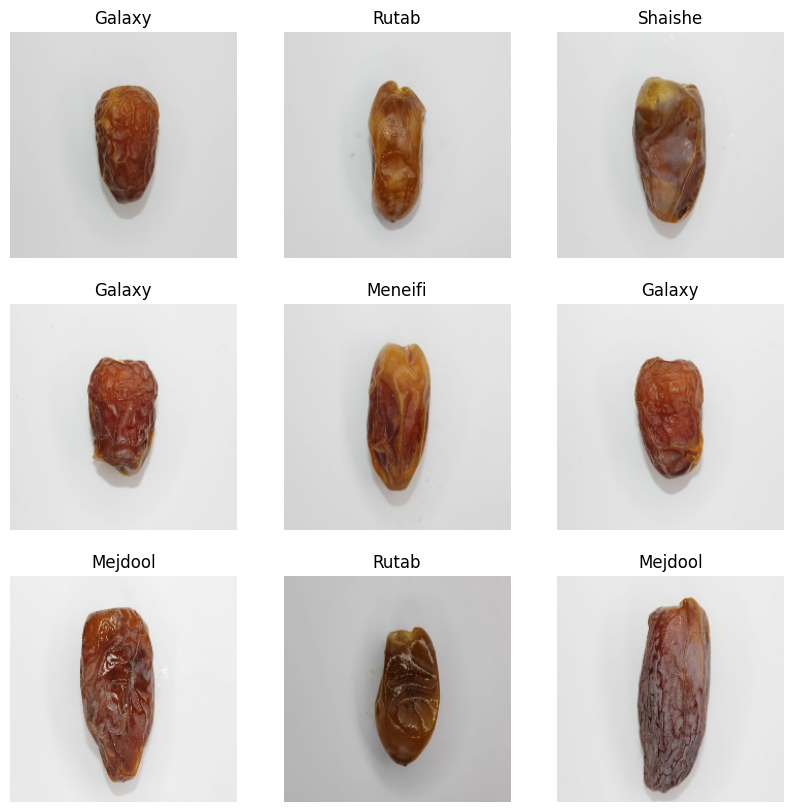

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
train_lable =[]
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
for image_batch, labels_batch in train_ds:
  train_lable.extend(labels_batch.numpy())
for image_batch, labels_batch in val_ds:
  train_lable.extend(labels_batch.numpy())
print(len(train_lable))

(32, 220, 220, 3)
(32,)
1156


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(975).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [11]:
normalization_layer = layers.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
# for image_batch, labels_batch in train_ds:
# print(image_batch)

0.024242328 0.9061415


In [13]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 220, 220, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 64)        1

In [16]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
29/29 [==============================] - 16s 92ms/step - loss: 2.2284 - accuracy: 0.2151 - val_loss: 1.8990 - val_accuracy: 0.3506
Epoch 2/20
29/29 [==============================] - 1s 39ms/step - loss: 1.3708 - accuracy: 0.4865 - val_loss: 1.2829 - val_accuracy: 0.4675
Epoch 3/20
29/29 [==============================] - 1s 38ms/step - loss: 0.9515 - accuracy: 0.6584 - val_loss: 0.9939 - val_accuracy: 0.6494
Epoch 4/20
29/29 [==============================] - 1s 39ms/step - loss: 0.7234 - accuracy: 0.7557 - val_loss: 0.8413 - val_accuracy: 0.7056
Epoch 5/20
29/29 [==============================] - 1s 38ms/step - loss: 0.5219 - accuracy: 0.8205 - val_loss: 0.6752 - val_accuracy: 0.7879
Epoch 6/20
29/29 [==============================] - 1s 39ms/step - loss: 0.4766 - accuracy: 0.8411 - val_loss: 0.7155 - val_accuracy: 0.8052
Epoch 7/20
29/29 [==============================] - 1s 39ms/step - loss: 0.4149 - accuracy: 0.8659 - val_loss: 0.4764 - val_accuracy: 0.8745
Epoch 8/20
2

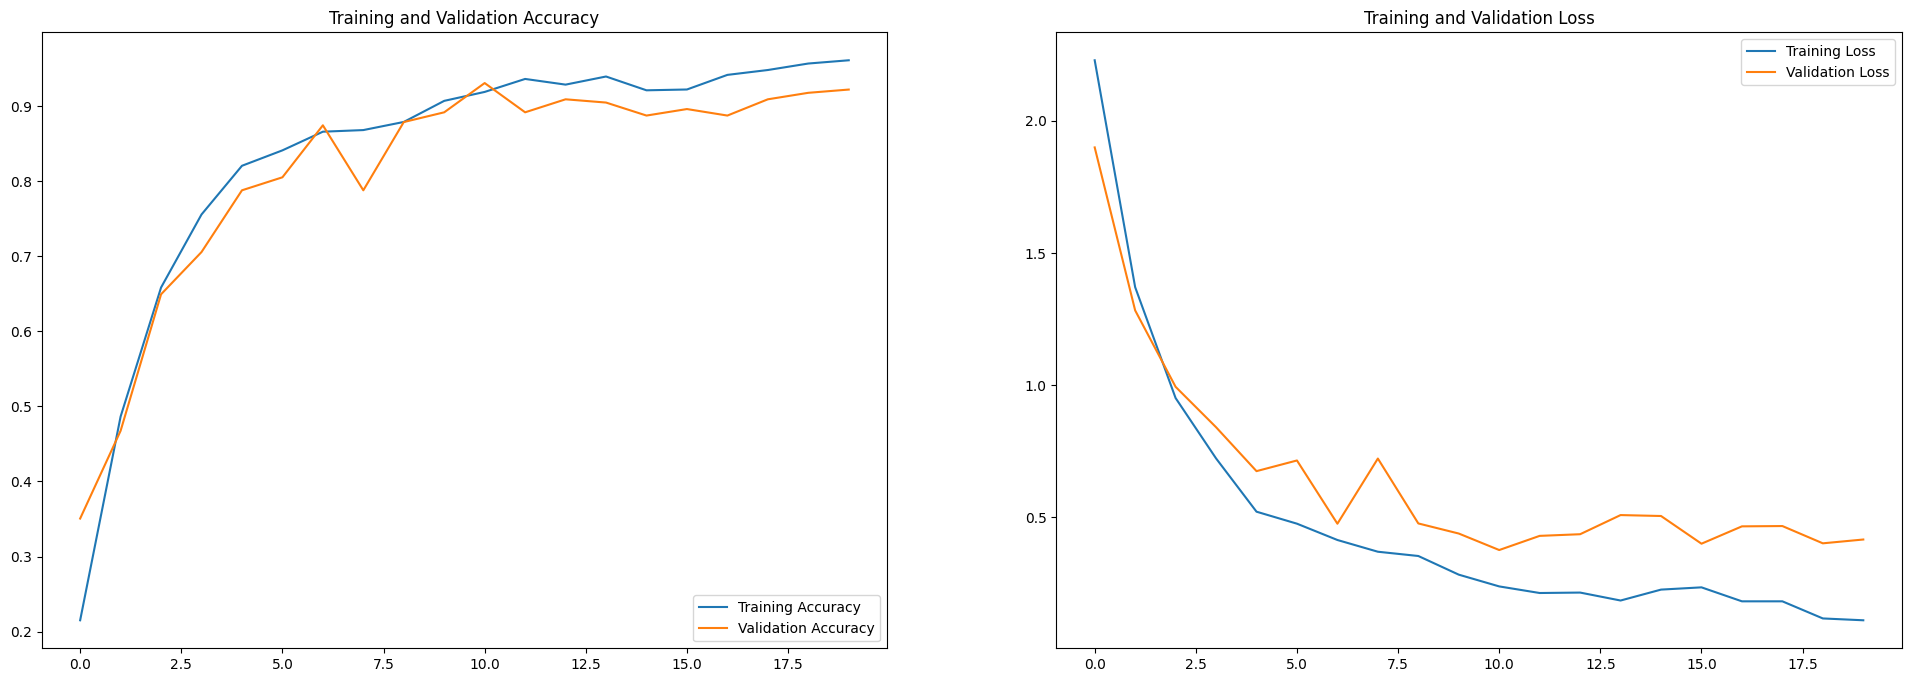

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
model.evaluate(val_ds)

8/8 [==============================] - 0s 10ms/step - loss: 0.4167 - accuracy: 0.9221


[0.416742205619812, 0.9220778942108154]

In [19]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'drive/MyDrive/MLProject/Date_Fruit_dataset/test',
    validation_split=None,
    subset=None,
    seed=123,
    # follow_links=True,
    image_size=(img_height, img_width),
    batch_size=502)

model.evaluate(test_data)


Found 502 files belonging to 9 classes.
1/1 [==============================] - 196s 196s/step - loss: 0.3259 - accuracy: 0.8964


[0.3258765637874603, 0.8964143395423889]

In [20]:
true_test_labels = []
x_test = []

for item in test_data:
  print(item[0].shape)
  print(item[1].shape)
  x_test= item[0]
  true_test_labels = item[1]
  break
  


(502, 220, 220, 3)
(502,)


In [23]:
predic = model.predict(x_test) 
y_predic = predic.argmax(axis=1)
print(y_predic)
print(classification_report(true_test_labels, y_predic, target_names=class_names))

16/16 [==============================] - 0s 15ms/step
[6 8 7 5 8 7 3 8 3 6 1 0 6 0 3 7 7 1 6 2 8 0 1 8 1 0 0 2 6 3 7 5 8 2 4 7 8
 3 7 4 7 1 2 5 3 7 6 3 8 8 3 2 8 6 3 0 7 8 3 2 6 7 1 3 5 6 1 1 1 4 1 1 7 1
 5 4 6 4 4 6 2 2 8 0 1 4 2 6 3 5 2 0 3 3 2 1 3 0 7 4 7 2 5 6 6 4 3 0 2 1 2
 2 5 7 0 2 1 8 6 7 3 7 3 5 4 5 7 5 3 8 4 7 6 1 4 0 3 0 4 5 7 6 4 8 7 7 5 6
 6 3 8 2 3 2 5 1 6 1 3 1 4 1 2 8 0 5 1 0 1 7 8 8 0 2 7 8 4 3 4 3 6 3 2 3 6
 2 1 1 3 6 4 2 3 8 5 4 5 3 2 7 1 1 3 1 7 8 4 0 1 4 7 8 3 8 0 2 8 1 1 0 0 2
 8 0 6 7 4 0 2 2 1 7 8 5 0 4 4 4 7 7 2 6 8 1 4 0 2 8 2 1 5 1 2 1 3 6 3 2 7
 1 1 5 0 1 4 1 7 0 5 8 1 4 0 2 4 0 3 1 7 7 8 4 4 1 4 6 7 3 3 6 0 3 3 7 5 5
 3 7 1 7 2 0 6 8 3 1 8 3 0 2 1 5 6 6 2 8 7 3 6 7 4 7 3 5 1 0 7 0 7 7 5 5 4
 3 7 0 2 1 3 8 0 1 3 6 7 7 3 3 5 2 3 8 3 2 7 7 8 8 6 3 3 4 0 0 2 3 0 2 3 4
 5 6 4 3 4 1 7 0 5 2 7 0 7 1 5 4 3 7 3 6 0 4 8 6 7 7 1 3 7 1 1 7 1 2 3 3 0
 0 8 0 5 2 6 7 8 7 3 8 6 6 2 0 7 0 0 3 2 2 5 8 4 6 1 3 0 3 6 7 7 6 4 2 3 8
 5 4 8 1 8 6 2 0 6 6 3 0 7 4 0 7 4 8 1 5 4 5 8

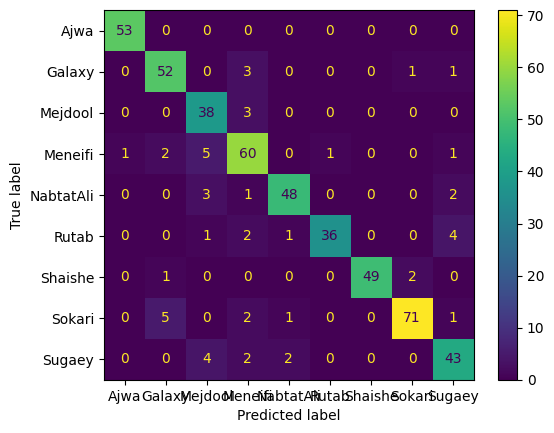

In [24]:
cm = confusion_matrix(true_test_labels, y_predic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()
plt.show()

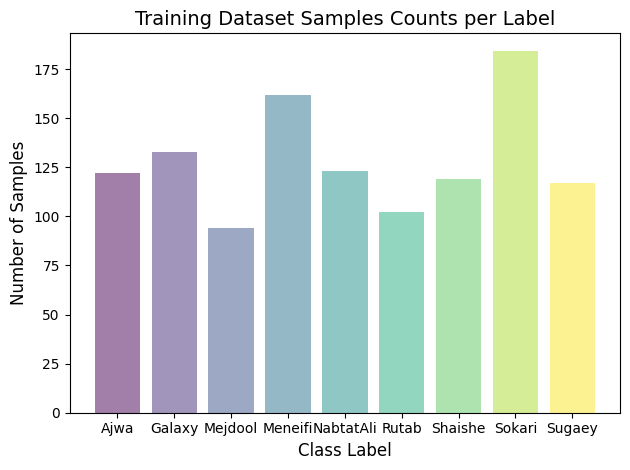

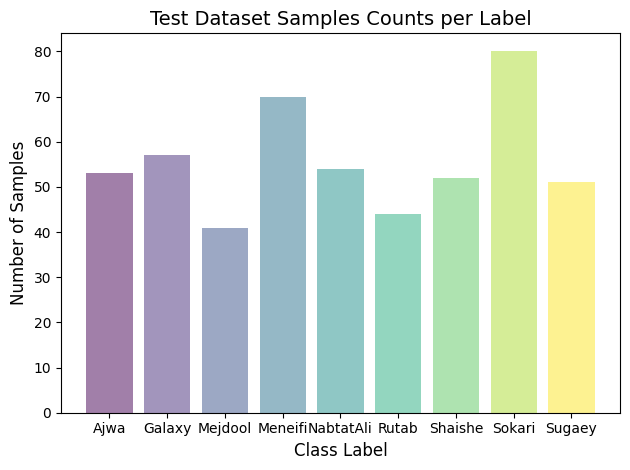

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Get the count of samples for each label in the training set
train_samples_counts = np.unique(train_lable, return_counts=True)[1]

# Define a color map for the classes
color_map = plt.get_cmap('viridis')
colors = color_map(np.linspace(0, 1, len(class_names)))

# Plot the number of samples for each label in the training set
for i, color in enumerate(colors):
    plt.bar(class_names[i], train_samples_counts[i], color=color, alpha=0.5)

# Add labels and title to the plot
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Training Dataset Samples Counts per Label', fontsize=14)
plt.tight_layout()
plt.show()

# Get the count of samples for each label in the test set
test_samples_counts = np.unique(true_test_labels, return_counts=True)[1]

# Plot the number of samples for each label in the test set
for i, color in enumerate(colors):
    plt.bar(class_names[i], test_samples_counts[i], color=color, alpha=0.5)

# Add labels and title to the plot
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Test Dataset Samples Counts per Label', fontsize=14)
plt.tight_layout()
plt.show()
